In [433]:
import pandas as pd
import numpy as np

In [434]:
anime = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\anime_ratings_data (2).csv")

In [443]:
anime.head(5)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,Movie,1,67.0,2015,2015,No,4649,86,3.979,3100.0,Toei Animation,No,Other
1,Movie,1,5.0,2008,2008,No,10,0,2.120,10.0,Others,No,Other
2,TV Special,1,46.0,2014,2014,No,1630,16,3.758,1103.0,Others,No,Other
3,Movie,1,67.0,1984,1984,No,4649,184,4.444,3100.0,Others,No,Drama
4,DVD Special,1,4.0,2019,2019,No,346,8,2.494,234.0,Others,No,Other


In [436]:
anime.shape

(6523, 15)

In [437]:
anime.columns

Index(['title', 'mediaType', 'eps', 'duration', 'startYr', 'finishYr',
       'description', 'contentWarn', 'watched', 'watching', 'rating', 'votes',
       'studio_primary', 'studios_colab', 'genre'],
      dtype='object')

In [438]:
anime = anime.drop(['title'],axis=1)

In [439]:
anime = anime.drop(['description'],axis=1)

In [440]:
#### Lets check for nulls:
anime.isnull().sum()[anime.isnull().sum()>0]

mediaType     27
duration     275
votes         27
dtype: int64

In [441]:
anime.mediaType.value_counts()
anime.duration.value_counts()
anime.votes.value_counts()

3100.0    1075
10.0       131
12.0       113
13.0       112
11.0       112
          ... 
1240.0       1
955.0        1
692.0        1
1348.0       1
1909.0       1
Name: votes, Length: 1554, dtype: int64

In [442]:
anime.mediaType.fillna('TV' , inplace=True)
anime.duration.fillna(anime.duration.mean() , inplace=True)
anime.votes.fillna(anime.votes.mean() , inplace=True)

#### Lets perform EDA on the Dataset and understand the data in depth :--

In [444]:
# Checking Statistical Summary
# object columns
anime.describe(include='object').T

,count,unique,top,freq
mediaType,6523,8,TV,2172
contentWarn,6523,2,No,5825
studio_primary,6523,11,Others,4684
studios_colab,6523,2,No,6210
genre,6523,9,Other,5468


In [445]:
import cufflinks as cf
import plotly 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [446]:
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected= True)   ### to connect to notebook
cf.go_offline()

<AxesSubplot:>

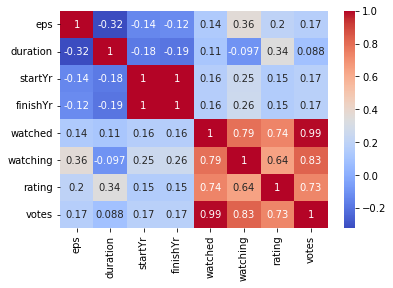

In [447]:
sns.heatmap(anime.corr(),annot=True , cmap='coolwarm')

In [448]:
# our target column i.e rating is highly influenced by votes , watching and watched features.

In [450]:
anime.iplot(kind='box', title='Boxplot')

In [451]:
anime.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

In [457]:
anime.iplot(x = 'genre' , y='rating' , kind='bar'  , 
          xTitle='genre',yTitle='rating' )

In [458]:
anime.iplot(kind='bar' ,mode='markers', x='mediaType',y='rating',xTitle='mediaType',yTitle='rating')

In [459]:
anime.iplot(kind='bar',x='studio_primary',y='rating',xTitle='studio_primary',yTitle='rating')

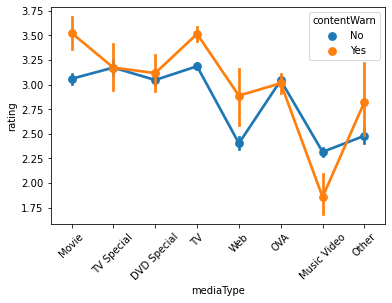

In [462]:
sns.pointplot(x='mediaType' , y='rating' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

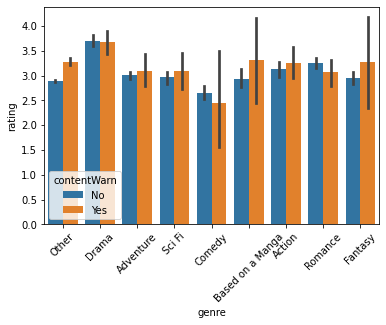

In [464]:
sns.barplot(x='genre' , y='rating' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

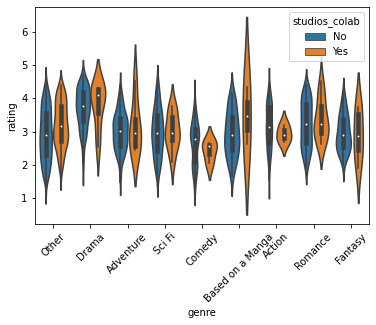

In [470]:
sns.violinplot(x='genre' , y='rating' , data=anime , hue='studios_colab')
plt.xticks(rotation='45');

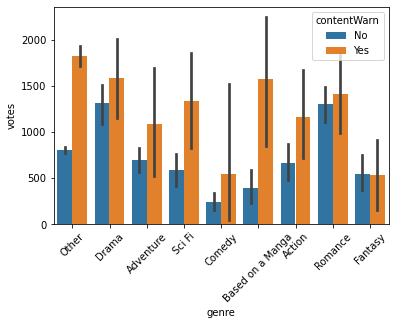

In [487]:
sns.barplot(x='genre' , y='votes' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

In [483]:
anime.columns

Index(['mediaType', 'eps', 'duration', 'startYr', 'finishYr', 'contentWarn',
       'watched', 'watching', 'rating', 'votes', 'studio_primary',
       'studios_colab', 'genre'],
      dtype='object')

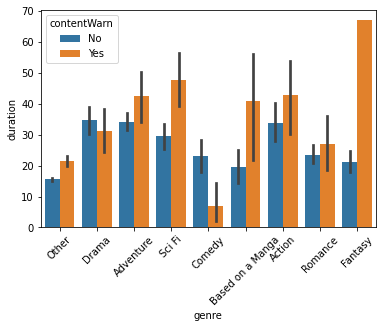

In [488]:
sns.barplot(x='genre' , y='duration' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

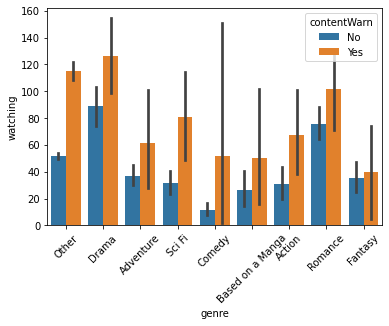

In [489]:
sns.barplot(x='genre' , y='watching' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

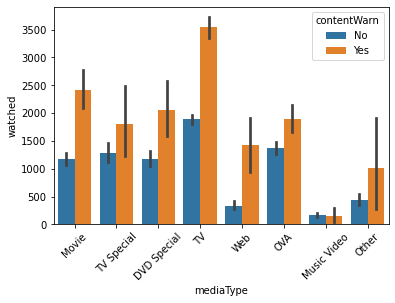

In [497]:
sns.barplot(x='mediaType' , y='watched' , data=anime , hue='contentWarn')
plt.xticks(rotation='45');

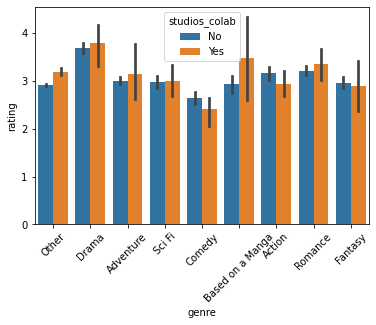

In [498]:
sns.barplot(x='genre' , y='rating' , data=anime , hue='studios_colab')
plt.xticks(rotation='45');

In [34]:
# check for objects:-
anime.select_dtypes(include='object').columns

Index([], dtype='object')

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
anime[anime.select_dtypes(include='object').columns]= anime[anime.select_dtypes(include='object').columns].apply(le.fit_transform)

In [329]:
anime = df1

In [193]:
anime = anime.loc[:,l1]

In [299]:
#  RFE Feature importance line :----->>feature imp line:_
anime= anime.loc[:,l1_rfe]

#### Sampling Stage:-

In [330]:
from sklearn.model_selection import train_test_split

In [331]:
anime_train , anime_test = train_test_split(anime , test_size=0.20 , random_state=555)



anime_train_x = anime_train.drop(['rating'],axis=1)
anime_train_y = anime_train.rating


anime_test_x = anime_test.drop(['rating'],axis=1)
anime_test_y = anime_test.rating

In [332]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [333]:
linreg.fit(anime_train_x ,anime_train_y)

LinearRegression()

In [334]:
Rsq = linreg.score(anime_train_x , anime_train_y)
Rsq

0.6877306289405352

In [335]:
N = anime_train_x.shape[0]
K= anime_train_x.shape[1]
AdjRSq= 1-(1-Rsq) * (N-1) / (N-K-1)
AdjRSq

0.6870003166324639

In [336]:
# prediction using linreg 
pred_train_lin = linreg.predict(anime_train_x)

In [337]:
# error linreg 
err_train_lin = anime_train_y - pred_train_lin
err_train_lin.mean()

-1.5516791238802683e-15

In [338]:
#checking for assumptions:--
import matplotlib.pyplot as plt

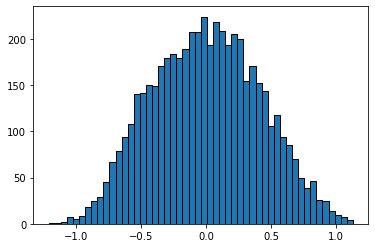

In [339]:
plt.hist(err_train_lin , bins=50, edgecolor='black');

In [340]:
err_train_lin.skew()

0.04340937957640542

In [341]:
err_train_lin.kurtosis() +3

2.4511649945987197

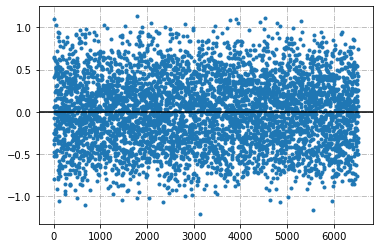

In [342]:
plt.plot(err_train_lin , '.')
plt.grid(linestyle='-.')
plt.axhline(y=err_train_lin.mean() , color='black')

In [343]:
import seaborn as sns

C:\Users\HARSH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


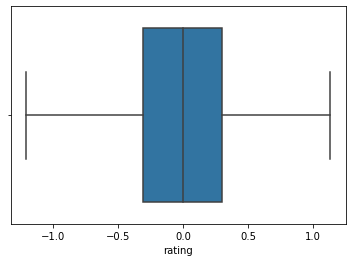

In [344]:
sns.boxplot(err_train_lin) ;

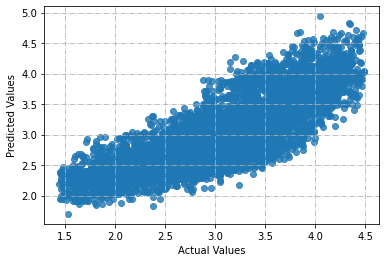

In [345]:
sns.regplot(x=anime_train_y , y=pred_train_lin)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(linestyle='-.')

In [346]:
mse_train_lin = np.mean(np.square(err_train_lin))
mse_train_lin

0.1716777406321591

In [347]:
rmse_train_lin = np.sqrt(mse_train_lin)
rmse_train_lin

0.4143401267463231

In [348]:
mape_train_lin = np.mean(np.abs(err_train_lin/anime_train_y*100))
mape_train_lin

12.628001954940393

In [349]:
acc_train_lin = 100-mape_train_lin
acc_train_lin

87.37199804505961

In [350]:
pred_test_lin = linreg.predict(anime_test_x)

In [351]:
err_test_lin = anime_test_y - pred_test_lin

In [352]:
mse_test_lin = np.mean(np.square(err_test_lin))
mse_test_lin

0.1688793261122018

In [353]:
rmse_test_lin = np.sqrt(mse_test_lin)
rmse_test_lin

0.41094929871238595

In [354]:
rmse_test_lin = np.sqrt(mse_test_lin)
rmse_test_lin

0.41094929871238595

In [355]:
mape_test_lin = np.mean(np.abs(err_test_lin/anime_test_y*100))
mape_test_lin

12.541567174880623

In [356]:
acc_test_lin = 100-mape_test_lin
acc_test_lin

87.45843282511937

In [357]:
pred_train_lin.min()

1.6989919143500973

In [358]:
linreg.coef_

array([-0.03011493,  0.01514835,  0.01347086,  0.02936204, -0.02109152,
       -0.14564021,  0.00044778,  0.00278532, -0.00039048,  0.0212533 ,
       -0.00172612,  0.00050474])

#### Lasso Model Building:--

In [223]:
from sklearn.linear_model import Lasso
las = Lasso()

In [224]:
las.fit(anime_train_x ,anime_train_y)
las.score(anime_train_x , anime_train_y)

0.6342508024447069

In [225]:
pred_train_las = las.predict(anime_train_x)
pred_test_las = las.predict(anime_test_x)


err_train_las = anime_train_y - pred_train_las
err_test_las = anime_test_y - pred_test_las


mse_train_las = np.mean(np.square(err_train_las))
mse_test_las = np.mean(np.square(err_test_las))


mape_train_las = np.mean(np.abs(err_train_las * 100 / anime_train_y))
mape_test_las = np.mean(np.abs(err_test_las * 100 / anime_test_y))

In [226]:
mse_train_las

0.20107958606789117

In [227]:
mse_test_las

0.1888877445977327

In [228]:
mape_train_las

13.882922859898601

In [229]:
mape_test_las

13.56568170950516

#### Build Ridge Model :--

In [230]:
from sklearn.linear_model import Ridge
rid = Ridge()

In [231]:
rid.fit(anime_train_x , anime_train_y)
rid.score(anime_train_x , anime_train_y)

0.6877296016918124

In [232]:
pred_train_rid = rid.predict(anime_train_x)
pred_test_rid = rid.predict(anime_test_x)


err_train_rid = anime_train_y - pred_train_rid
err_test_rid = anime_test_y - pred_test_rid


mse_train_rid = np.mean(np.square(err_train_rid))
mse_test_rid = np.mean(np.square(err_test_rid))


mape_train_rid = np.mean(np.abs(err_train_rid * 100 / anime_train_y))
mape_test_rid = np.mean(np.abs(err_test_rid * 100 / anime_test_y))

In [233]:
mse_train_rid

0.17167830538732257

In [234]:
mse_test_rid

0.1688813999570126

In [235]:
mape_train_rid

12.628124399192023

In [236]:
mape_test_rid

12.541365815090051

In [237]:
anime_coef = pd.DataFrame()
anime_coef['features'] = anime_train_x.columns
anime_coef['coef'] = linreg.coef_
anime_coef['coef_lasso'] = las.coef_
anime_coef['coef_ridge'] = rid.coef_
anime_coef.sort_values('coef_lasso',ascending=False)
anime_coef

,features,coef,coef_lasso,coef_ridge
0,mediaType,-0.030115,-0.000000,-0.030113
1,eps,0.015137,0.000000,0.015138
2,duration,0.013462,0.008780,0.013462
3,startYr,0.029375,0.000000,0.029358
4,finishYr,-0.021107,0.000000,-0.021089
5,contentWarn,-0.145624,-0.000000,-0.145300
6,watched,0.000448,0.000354,0.000448
7,watching,0.002785,0.002663,0.002785
8,votes,-0.000390,-0.000216,-0.000390
9,studio_primary,0.021257,0.000000,0.021258


In [89]:
anime_rel = pd.DataFrame(anime_coef[anime_coef['coef_lasso']!=0])
anime_rel

,features,coef,coef_lasso,coef_ridge
2,duration,0.013622,0.009104,0.013622
6,watched,0.000469,0.000384,0.000469
7,watching,0.002945,0.002852,0.002944
8,votes,-0.000422,-0.000262,-0.000422


#### Taking care of Outliers :- 

In [90]:
def remove_outliers(df , col , k):
    mean=df[col].mean()
    global df1
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k*sd)]
    final_list = [x for x in final_list if (x < mean + k*sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print('number of outliers removed===>>' , df.shape[0] - df1.shape[0])

In [91]:
 remove_outliers(anime , 'rating' , 2)

(6430, 13)
number of outliers removed===>> 93


#### Feature selection using Regressive Feature Elimination Technique:-

In [137]:
from sklearn.feature_selection import RFE

In [183]:
rfe_lin = RFE(linreg , n_features_to_select= 10)

In [184]:
x=anime.drop(['rating'],axis=1)
y=anime.rating

In [185]:
rfe_lin.fit(anime_train_x ,anime_train_y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [186]:
rfe_lin.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True])

In [187]:
# now lets create df
feat_imp_rfe = pd.DataFrame()
feat_imp_rfe['features'] = x.columns
feat_imp_rfe['imp'] = rfe_lin.support_

In [188]:
feat_imp_rfe[feat_imp_rfe.imp == True]

,features,imp
0,mediaType,True
1,eps,True
2,duration,True
3,startYr,True
4,finishYr,True
5,contentWarn,True
7,watching,True
9,studio_primary,True
10,studios_colab,True
11,genre,True


In [192]:
l1 = list(feat_imp_rfe.features[0:10])
l1.append('rating')
l1

['mediaType',
 'eps',
 'duration',
 'startYr',
 'finishYr',
 'contentWarn',
 'watched',
 'watching',
 'votes',
 'studio_primary',
 'rating']

#### Decision Tree Regressor :--

In [239]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import *

In [240]:
dt_reg = DecisionTreeRegressor()

In [241]:
dt_reg.fit(anime_train_x, anime_train_y)

DecisionTreeRegressor()

In [242]:
dt_pred = dt_reg.predict(anime_test_x)

In [244]:
dt_r2 = r2_score(anime_test_y, dt_pred)
dt_r2

0.595140844048051

In [245]:
dt_mse = mean_squared_error(anime_test_y, dt_pred)
dt_mse

0.22079402516382374

In [256]:
err_test_dt = anime_test_y - dt_pred

In [257]:
mape_test_dt = np.mean(np.abs(err_test_dt/anime_test_y*100))
mape_test_dt

13.616151609593446

In [258]:
acc_dt = 100-mape_test_dt
acc_dt

86.38384839040656

#### Random Forest Regressor :--

In [246]:
from sklearn.ensemble import RandomForestRegressor

In [247]:
rf_reg = RandomForestRegressor()

In [248]:
rf_reg.fit(anime_train_x, anime_train_y)

RandomForestRegressor()

In [249]:
rf_pred = rf_reg.predict(anime_test_x)

In [251]:
rf_r2 = r2_score(anime_test_y, rf_pred)
rf_r2

0.7691354134771963

In [252]:
rf_mse = mean_squared_error(anime_test_y, rf_pred)
rf_mse

0.1259043313625875

In [253]:
err_test_rf = anime_test_y - rf_pred

In [254]:
mape_test_rf = np.mean(np.abs(err_test_rf/anime_test_y*100))
mape_test_rf

10.586935578159776

In [255]:
acc_rf = 100-mape_test_rf
acc_rf

89.41306442184022

#### XGBOOST Regressor :--

In [261]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\HARSH\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\HARSH\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\HARSH\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\HARSH\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\HARSH\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\HARSH\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\HARSH\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\HARSH\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
soc

In [264]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\HARSH\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            gpu_0          14 KB  conda-forge
    conda-4.14.0               |   py39hcbf5309_0         1.0 MB  conda-forge
    libxgboost-2.0.3           |       h5da7b33_0         2.6 MB
    py-xgboost-2.0.3           |cuda120_pyh3ef1b53_4         130 KB  conda-forge
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    xgboost-2.0.3              |cuda120_pyh68bd8d9_4          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.7 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mutex-2.0-gp



==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [267]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()

In [268]:
xgb_reg.fit(anime_train_x, anime_train_y)
xgb_pred = xgb_reg.predict(anime_test_x)


In [269]:
xgb_r2 = r2_score(anime_test_y, xgb_pred)
xgb_r2

0.7626141541064396

In [270]:
xgb_mse = mean_squared_error(anime_test_y, xgb_pred)
xgb_mse

0.12946076595086084

In [271]:
err_test_xgb = anime_test_y - xgb_pred 

In [272]:
mape_test_xgb = np.mean(np.abs(err_test_xgb/anime_test_y*100))
mape_test_xgb

10.645715797000136

In [273]:
acc_xgb = 100-mape_test_xgb
acc_xgb

89.35428420299986

#### Adaboost Regressor :--

In [274]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor()
ada_reg.fit(anime_train_x, anime_train_y)
ada_pred = ada_reg.predict(anime_test_x)

In [275]:
ada_r2 = r2_score(anime_test_y, ada_pred)
ada_r2

0.735558619749604

In [276]:
ada_mse = mean_squared_error(anime_test_y, ada_pred)
ada_mse

0.14421577456504875

In [277]:
err_test_ada = anime_test_y - ada_pred  

In [278]:
mape_test_ada = np.mean(np.abs(err_test_ada/anime_test_y*100))
mape_test_ada

11.617602814488954

In [279]:
acc_ada = 100-mape_test_ada
acc_ada

88.38239718551105

#### Feature Importance using RFE and Variance Technique :--

In [280]:
anime = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\anime_ratings_data (2).csv")

In [286]:
anime.head(5)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,1,1,67.0,2015,2015,0,4649,86,3.979,3100.0,10,0,6
1,1,1,5.0,2008,2008,0,10,0,2.120,10.0,4,0,6
2,6,1,46.0,2014,2014,0,1630,16,3.758,1103.0,4,0,6
3,1,1,67.0,1984,1984,0,4649,184,4.444,3100.0,4,0,4
4,0,1,4.0,2019,2019,0,346,8,2.494,234.0,4,0,6


In [282]:
anime = anime.drop(['title'],axis=1)

In [283]:
anime = anime.drop(['description'],axis=1)

In [284]:
anime.mediaType.fillna('TV' , inplace=True)
anime.duration.fillna(anime.duration.mean() , inplace=True)
anime.votes.fillna(anime.votes.mean() , inplace=True)

In [285]:
anime[anime.select_dtypes(include='object').columns]= anime[anime.select_dtypes(include='object').columns].apply(le.fit_transform)

In [287]:
x = anime.drop(['rating'],axis=1)
y = anime.rating

In [288]:
from sklearn.feature_selection import RFE

In [291]:
rfe = RFE(linreg , n_features_to_select= 10)

In [292]:
rfe.fit(x , y)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [293]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True])

In [294]:
# now lets create df
feat_imp_rfe = pd.DataFrame()
feat_imp_rfe ['features'] = x.columns
feat_imp_rfe ['imp'] = rfe.support_

In [295]:
feat_imp_rfe

,features,imp
0,mediaType,True
1,eps,True
2,duration,True
3,startYr,True
4,finishYr,True
5,contentWarn,True
6,watched,False
7,watching,True
8,votes,False
9,studio_primary,True


In [297]:
feat_imp_rfe = feat_imp_rfe[feat_imp_rfe.imp == True]
feat_imp_rfe

,features,imp
0,mediaType,True
1,eps,True
2,duration,True
3,startYr,True
4,finishYr,True
5,contentWarn,True
7,watching,True
9,studio_primary,True
10,studios_colab,True
11,genre,True


In [298]:
l1_rfe = list(feat_imp_rfe.features[:])
l1_rfe.append('rating')
l1_rfe

['mediaType',
 'eps',
 'duration',
 'startYr',
 'finishYr',
 'contentWarn',
 'watching',
 'studio_primary',
 'studios_colab',
 'genre',
 'rating']

#### check for variance in the columns (if any) , using Variance Technique :--

In [359]:
from sklearn.feature_selection import VarianceThreshold

In [360]:
var = VarianceThreshold()

In [361]:
var.fit(anime)

VarianceThreshold()

In [362]:
var.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
# Hence all the features are having some amount of variance and hence information gain .

#### Pickling the model :--

In [364]:
import pickle

In [365]:
with open('Anime_dataset', 'wb') as f:
    pickle.dump(linreg , f)

In [366]:
with open('Anime_dataset', 'rb') as f:
    loaded_model = pickle.load(f)

#### KNN Imputer Technique for filling nulls :--

In [393]:
anime = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\anime_ratings_data (2).csv")

In [409]:
anime.head(5)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,1,1,67.0,2015,2015,0,4649,86,3.979,3100.0,10,0,6
1,1,1,5.0,2008,2008,0,10,0,2.120,10.0,4,0,6
2,6,1,46.0,2014,2014,0,1630,16,3.758,1103.0,4,0,6
3,1,1,67.0,1984,1984,0,4649,184,4.444,3100.0,4,0,4
4,0,1,4.0,2019,2019,0,346,8,2.494,234.0,4,0,6


In [395]:
anime = anime.drop(['title'],axis=1)

In [396]:
anime = anime.drop(['description'],axis=1)

In [397]:
anime[anime.select_dtypes(include='object').columns]= anime[anime.select_dtypes(include='object').columns].apply(le.fit_transform)

In [398]:
anime.isnull().sum()[anime.isnull().sum()>0]

duration    275
votes        27
dtype: int64

#### lets fill the nulls using KNN Imputer Technique:--

In [399]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)  # taking  default value for number of neighbors in this case .
data_after_imputation = imputer.fit_transform(anime)

In [400]:
anime1 = pd.DataFrame(data_after_imputation)
anime1

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,1.0,67.0,2015.0,2015.0,0.0,4649.0,86.0,3.979,3100.0,10.0,0.0,6.0
1,1.0,1.0,5.0,2008.0,2008.0,0.0,10.0,0.0,2.120,10.0,4.0,0.0,6.0
2,6.0,1.0,46.0,2014.0,2014.0,0.0,1630.0,16.0,3.758,1103.0,4.0,0.0,6.0
3,1.0,1.0,67.0,1984.0,1984.0,0.0,4649.0,184.0,4.444,3100.0,4.0,0.0,4.0
4,0.0,1.0,4.0,2019.0,2019.0,0.0,346.0,8.0,2.494,234.0,4.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,5.0,12.0,5.0,2013.0,2013.0,0.0,4649.0,199.0,3.633,3100.0,4.0,0.0,6.0
6519,3.0,2.0,44.5,1997.0,1997.0,0.0,341.0,9.0,2.573,208.0,7.0,0.0,6.0
6520,2.0,1.0,4.0,2016.0,2016.0,0.0,25.0,0.0,1.749,14.0,4.0,0.0,6.0
6521,5.0,24.0,7.5,2018.0,2019.0,1.0,4649.0,199.0,4.145,3100.0,0.0,0.0,6.0


In [403]:
anime1.columns = anime.columns
anime1.head(5)

,mediaType,eps,duration,startYr,finishYr,contentWarn,watched,watching,rating,votes,studio_primary,studios_colab,genre
0,1.0,1.0,67.0,2015.0,2015.0,0.0,4649.0,86.0,3.979,3100.0,10.0,0.0,6.0
1,1.0,1.0,5.0,2008.0,2008.0,0.0,10.0,0.0,2.120,10.0,4.0,0.0,6.0
2,6.0,1.0,46.0,2014.0,2014.0,0.0,1630.0,16.0,3.758,1103.0,4.0,0.0,6.0
3,1.0,1.0,67.0,1984.0,1984.0,0.0,4649.0,184.0,4.444,3100.0,4.0,0.0,4.0
4,0.0,1.0,4.0,2019.0,2019.0,0.0,346.0,8.0,2.494,234.0,4.0,0.0,6.0


In [ ]:
# checking if nulls are removed using KNN Imputer technique :--

In [402]:
anime1.isnull().sum()[anime1.isnull().sum()>0]

Series([], dtype: int64)